<div style="display: flex; align-items: center;">
    <img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png"
         width="500" height="auto" style="margin-right: 100px;" />
    <div>
        <p><strong>Prof. Dr. Thomas Nagel</strong></p>
        <p>
            Chair of Soil Mechanics and Foundation Engineering<br>
            Geotechnical Institute<br>
            Technische Universität Bergakademie Freiberg.
        </p>
        <p>
            <a href="https://tu-freiberg.de/en/soilmechanics">
                https://tu-freiberg.de/en/soilmechanics
            </a>
        </p>
    </div>
</div>

<div style="display: flex; align-items: center;">
    <p style="margin-top: 1em;">
        To activate the <strong>interactive features</strong> when in nbviewer mode, click on &quot;Execute on Binder&quot;
        <img src="https://mybinder.org/static/favicon.ico"
             alt="Binder"
             style="height: 1.1em; vertical-align: middle; margin: 0 6px;">
        on the top right. Then, click on Run → Run All Cells.
    </p>
</div>


# Illustration grundlegender Kennwerte

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import widgets
from ipywidgets import interact
import matplotlib.cm as cm

#Some plot settings
import plot_functions.plot_settings
%run plot_functions/basic_quantities_plots.ipynb

Porosität (Porenanteil) $n$ und Feststoffanteil $n_\text{s}$ sind wie folgt verknüpft:

$$
    n = \phi = \frac{V_\text{p}}{V} = \frac{V - V_\text{s}}{V} = 1 - n_\text{s} 
$$

Die Porenzahl $e$ ergibt sich entsprechend zu

$$
    e = \frac{V_\text{p}}{V_\text{s}} = \frac{V - V_\text{s}}{V_\text{s}} = \frac{1}{1 - n} - 1 = \frac{n}{1-n}
$$

Die folgende Abbildung verdeutlicht die resultierenden nichtlinearen Zusammenhänge.

In [2]:
def porenzahl(porosity):
    return porosity/(1.-porosity)

In [3]:
@interact(por=widgets.FloatSlider(min=0.0, max=0.95, step=0.05, value=0.3,
    description=r'$n$'))
def plot_slide(por = 0.3):
    plot_e_n(por)

interactive(children=(FloatSlider(value=0.3, description='$n$', max=0.95, step=0.05), Output()), _dom_classes=…

Die Porosität ist im gesamten Bereich von reinem Festkörper ($n = 0$) bis zum reinen Fluid ($n = 1$) definiert. Die Porenzahl verschwindet für den reinen Feststoff, $e=0$, wird aber für das reine Fluid unendlich.

Es sei nun zusätzlich die Masse des feuchten Bodens $m$ gegeben. Daraus lassen sich wiederum Größen wie Wassergehalt $w$ und Sättigung $S_\text{r}$ bestimmen:

$$
    w = \frac{m_\text{w}}{m_\text{d}} = \frac{m-m_\text{d}}{m_\text{d}}
$$
sowie
$$
    S = \frac{V_\text{w}}{V_\text{p}} = \frac{V_\text{w}}{V}\frac{V}{V_\text{p}} = \frac{n_\text{w}}{n}
$$

Eine Umrechnung der Massen in Volumina erfolgt mittels der Wasserdichte $\varrho_\text{w} = 1000\,$kg$\,$m$^{-3}$ und liefert

$$
    V_\text{w} = \frac{m_\text{w}}{\varrho_\text{w}}
$$

Somit können wir schreiben:
$$
    S = \frac{(m - m_\text{d})}{\varrho_\text{w} e V_\text{s}} = \frac{(m - m_\text{d})\varrho_\text{s}}{\varrho_\text{w} e m_\text{d}} = \frac{\varrho_\text{s}}{\varrho_\text{w}}\frac{w}{e}
$$

In [4]:
def saturation(w,e):
    rho_s = 2600. #kg/m³ unterstellte Korndichte
    rho_w = 1000. #kg/m³ Wasserdichte
    return rho_SR/rho_WR * w/e

In [5]:
@interact(por=widgets.FloatSlider(min=0.1, max=0.9, step=0.05, value=0.3,
    description=r'$n$'),
         Sat=widgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=0.3,
    description=r'$S$'))

def plot_slide(por = 0.3, Sat = 0.8):
    plot_w_S_n(por,Sat)

interactive(children=(FloatSlider(value=0.3, description='$n$', max=0.9, min=0.1, step=0.05), FloatSlider(valu…

## Rechenaufgabe

Von einem feuchten grobkörnigen Boden wurde der Porenanteil mit einem Wert von $n=0.3$ und die Wichte mit dem Wert $\gamma = 19.61\,\text{kN}\,\text{m}^{-3}$ ermittelt.

Wie hoch ist der Wassergehalt dieses Bodens, wenn

    a) seine Korndichte 2700 kg/m³ beträgt bzw.
    b) zum Erreichen des gesättigten Zustands die Zugabe von 189 Liter Wasser pro m³ erforderlich ist?

In [6]:
n = 0.3
gamma = 19.61 # kN/m³
rho_s = 2700. # kg/m³
Delta_n_W = 0.189 #Änderung des Porenwasseranteils m³/m³

Der Wassergehalt ist mit 

$$
    w = \frac{m_\text{w}}{m_\text{d}} = \frac{m}{m_\text{d}} - 1
$$

gegeben.

### Teilaufgabe a)

Die Feucht und Trockenmassen des Bodens folgen aus

\begin{align}
    m &= \varrho V = \frac{\gamma}{g} V
    \
    m_\text{d} &= \varrho_\text{d} V = \varrho_\text{s} V_\text{s}
    \
    &= (1-n) \varrho_\text{s} V
\end{align}

Somit können wir für den Wassergehalt schreiben:

$$
    w = \frac{m}{m_\text{d}} - 1 = \frac{\gamma}{g (1-n) \varrho_\text{s}} - 1 =  \frac{\gamma}{(1-n) \gamma_\text{s}} - 1
$$

In [7]:
w = gamma/((1-n)*9.81*rho_s * 1.e-3) - 1
print("Der Wassergehalt für Teilaufgabe a) beträgt %.2f Prozent." %(w*100))

Der Wassergehalt für Teilaufgabe a) beträgt 5.77 Prozent.


### Teilaufgabe b)

Bei Vollsättigung ist der gesamte Porenraum des Bodens mit Wasser gefüllt. Das heißt

$$
    V_\text{w2} = V_\text{p} = n V
$$

Zuvor ist das Porenvolumen mit Wasser und Luft gefüllt:

$$
    V_\text{p} = V_\text{w1} + V_\text{a1}
$$

Die Differenz beider Wasservolumina entspricht der zugegebenen Wassermenge $\Delta V_\text{w} = 189\,$l.

$$
    V_\text{w2} - V_\text{w1} = V_\text{a1}
$$

d.h. beim Aufsättigen wird das Porenluftvolumen vom zugegebenen Wasser verdrängt.

Damit ergibt sich

$$
    n V = V_\text{w1} + \Delta V_\text{w}
$$

Bzw. mit dem Porenwasseranteil $n_\text{w}$

$$
    n = n_\text{w1} + \Delta n_\text{w}
$$

In [8]:
n_w1 = n - Delta_n_W
print("Die maximale Wassermenge im Porenraum beträgt %.2f Liter pro m³ Boden." %(n*1000.))
print("Im Ausgangszustand enthielt 1 m³ Boden %.2f Liter Wasser." %(n_w1*1000))

Die maximale Wassermenge im Porenraum beträgt 300.00 Liter pro m³ Boden.
Im Ausgangszustand enthielt 1 m³ Boden 111.00 Liter Wasser.


Das Volumen $V_\text{w1}$ entspricht der Wassermasse $m_\text{w1} = \varrho_\text{w} V_\text{w1}$ mit $\varrho_\text{w} = 1000\,$kg/m³.

Die Trockenmasse des Bodens ergibt sich zu

$$
    m_\text{d} = m - m_\text{w1} = \frac{\gamma}{g} V - \varrho_\text{w} V_\text{w1}
$$

$$
    w = \frac{m_\text{w1}}{m_\text{d}} = \frac{m_\text{w1}}{m - m_\text{w1}} = \frac{V_\text{w1} \varrho_\text{w}}{\frac{\gamma}{g} V - \varrho_\text{w} V_\text{w1}} = \frac{n_\text{w1} \varrho_\text{w}}{\frac{\gamma}{g} - \varrho_\text{w} n_\text{w1}}
$$


In [9]:
rho_w = 1000.
w = n_w1 * rho_w / (gamma*1000/9.81 - rho_w * n_w1)
print("Der Wassergehalt für Teilaufgabe a) beträgt %.2f Prozent." %(w*100))

Der Wassergehalt für Teilaufgabe a) beträgt 5.88 Prozent.


## Einordnung der Lagerungsdichte von Böden nach $D$ und $I_D$

Die Einordnung der Lagerungsdichte wird in von Soos und Engel (Grundbau Taschenbuch) in Bezug auf $D$ angegeben. In DIN EN ISO 14688-2, Tabelle 5 jedoch in Bezug auf $I_D$. Die Zahlenwerte der Übergangspunkte unterscheiden sich. Im Folgenden zeigen wir, dass eine 1:1 Korrespondenz nicht besteht.


Seien $\text{max}\,n = 0.476$ und $\text{min}\,n = 0.259$. Dann ergeben sich für die Einteilung nach GBT folgende Porositäten an den Übergängen der Lagerungsdichteeinordnung bezogen auf $D$:

- $0 \leq D < 0.15$: sehr locker
- $0.15 < D \leq 0.3$: locker
- $0.3 < D \leq 0.5$: mitteldicht
- $0.5 < D \leq 0.8$: dicht
- $0.8 < D$: sehr dicht

In [10]:
D = np.array([0,0.15,0.3,0.5,0.8,1])

In [11]:
n_max = 0.476
n_min = 0.259

e_max = porenzahl(n_max)
e_min = porenzahl(n_min)

def porosity_from_D(D):
    return n_max - D * (n_max - n_min)

def I_D(porenzahl):
    return (e_max - porenzahl)/(e_max - e_min)

In [12]:
n = porosity_from_D(D)
e = porenzahl(n)
ID = I_D(e)

In [13]:
for i in range(len(D)):
    print("Lagerungsdichte D = %.3f. Porosität von n = %.3f. Porenzahl e = %.3f. Bezogene Lagerungsdichte I_D = %.3f" %(D[i],n[i],e[i],ID[i]))

Lagerungsdichte D = 0.000. Porosität von n = 0.476. Porenzahl e = 0.908. Bezogene Lagerungsdichte I_D = 0.000
Lagerungsdichte D = 0.150. Porosität von n = 0.443. Porenzahl e = 0.797. Bezogene Lagerungsdichte I_D = 0.200
Lagerungsdichte D = 0.300. Porosität von n = 0.411. Porenzahl e = 0.698. Bezogene Lagerungsdichte I_D = 0.377
Lagerungsdichte D = 0.500. Porosität von n = 0.367. Porenzahl e = 0.581. Bezogene Lagerungsdichte I_D = 0.586
Lagerungsdichte D = 0.800. Porosität von n = 0.302. Porenzahl e = 0.433. Bezogene Lagerungsdichte I_D = 0.850
Lagerungsdichte D = 1.000. Porosität von n = 0.259. Porenzahl e = 0.350. Bezogene Lagerungsdichte I_D = 1.000


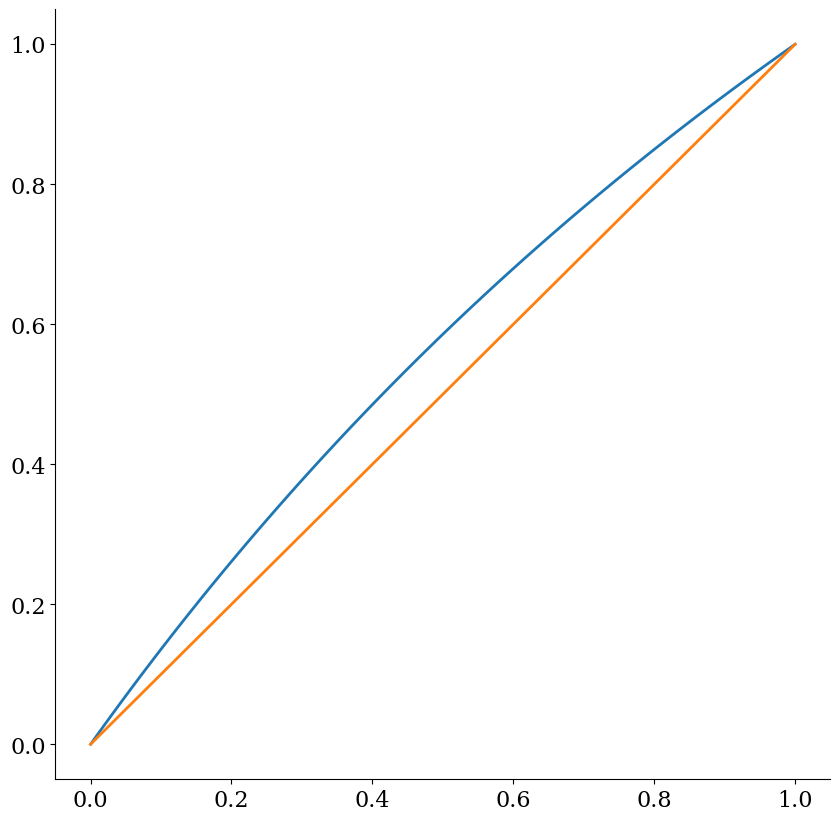

In [14]:
Ds = np.linspace(0,1,100)
plt.plot(Ds, I_D(porenzahl(porosity_from_D(Ds))))
plt.plot(Ds,Ds)